# Aplicación de los métodos de selección de atributos al conjunto de datos load_wine

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

## Exploración de los Datos

In [37]:
data=load_wine()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [38]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [39]:
# Verificar valores faltantes
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

**Descripción de las Columnas**

- **alcohol:** Contenido de alcohol en el vino (porcentaje).
- **malic_acid:** Concentración de ácido málico, que influye en la acidez del vino.
- **ash:** Contenido de cenizas, que puede ser un indicador de minerales presentes.
- **alcalinity_of_ash:** Alcalinidad de las cenizas, relacionada con el pH del vino.
- **magnesium:** Concentración de magnesio, un mineral importante para la salud y el sabor del vino.
- **total_phenols:** Total de fenoles, compuestos que afectan el sabor y la coloración del vino.
- **flavanoids:** Concentración de flavonoides, que son antioxidantes y contribuyen al color y sabor.
- **nonflavanoid_phenols:** Fenoles no flavonoides, que también afectan el sabor pero no son antioxidantes.
- **proanthocyanins:** Compuestos que influyen en la astringencia y color del vino.
- **color_intensity:** Intensidad del color del vino, una característica visual importante.
- **hue:** Matiz del color del vino, que puede indicar su edad o tipo.
- **od280/od315_of_diluted_wines:** Relación óptica a 280 nm y 315 nm, utilizada para medir la concentración de compuestos fenólicos.
- **proline:** Un aminoácido que puede influir en el sabor y aroma del vino.
- **target:** Variable objetivo (int), probablemente indicando la clase o tipo de vino (por ejemplo, calidad o variedad).

In [41]:
"""valores = df['target'].unique()
valores

# Aplicar One-Hot Encoding a la columna 'target'
df = pd.get_dummies(df, columns=['target'])"""

"valores = df['target'].unique()\nvalores\n\n# Aplicar One-Hot Encoding a la columna 'target'\ndf = pd.get_dummies(df, columns=['target'])"

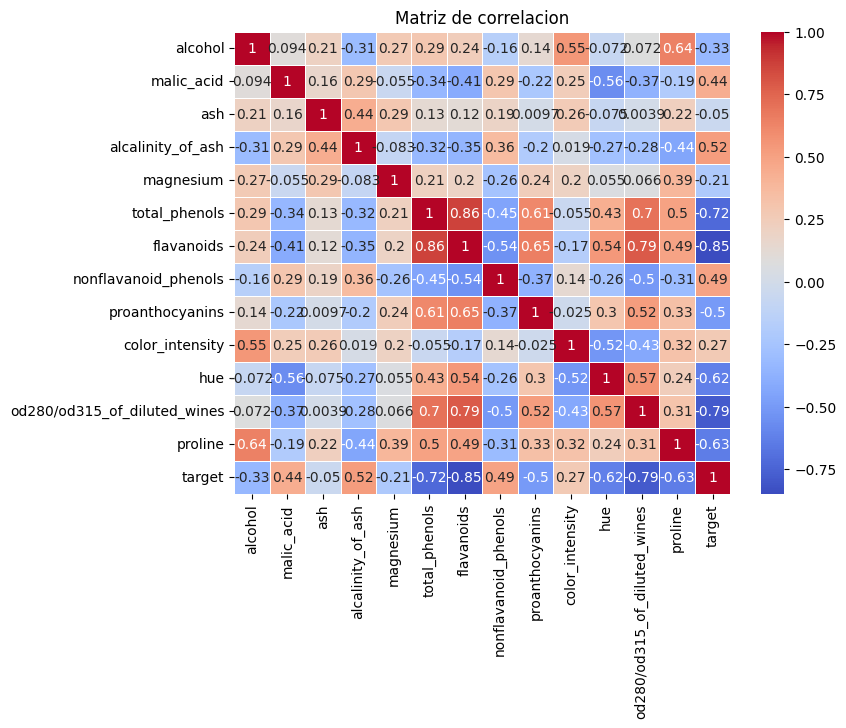

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Matriz de correlacion')
plt.show()

correlationMatrix=df.corr()

## Selección de Atributos

In [43]:
# Aplicar seleccion segun correlacion
correlationTarget=abs(correlationMatrix['target'])
relevantFeatures=correlationTarget[correlationTarget>0.5]
print("Atributos relevantes basados en la correlacion:")
print(relevantFeatures)

Atributos relevantes basados en la correlacion:
alcalinity_of_ash               0.517859
total_phenols                   0.719163
flavanoids                      0.847498
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
target                          1.000000
Name: target, dtype: float64


In [44]:
# Ganancia de informacion
from sklearn.feature_selection import mutual_info_classif

# calculo de ganancia de info de cada atributo
X=df.drop(columns=['target'])
y=df['target']
infoGain=mutual_info_classif(X,y)

# Dataframe 
infoGainDF=pd.DataFrame({"Feature":X.columns, "InfoGain":infoGain})
infoGainDF=infoGainDF.sort_values(by="InfoGain",ascending=False)
print('Atributos ordenados por Ganancia de Informacion')
print(infoGainDF)

Atributos ordenados por Ganancia de Informacion
                         Feature  InfoGain
6                     flavanoids  0.669758
12                       proline  0.557213
9                color_intensity  0.554070
11  od280/od315_of_diluted_wines  0.507740
0                        alcohol  0.470064
10                           hue  0.461139
5                  total_phenols  0.419727
8                proanthocyanins  0.277770
1                     malic_acid  0.271936
3              alcalinity_of_ash  0.259117
4                      magnesium  0.205616
7           nonflavanoid_phenols  0.127136
2                            ash  0.074355


In [45]:
# Basado en consistencia

from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar los 10 mejores atributos basados en su consistencia con la clase
selector=SelectKBest(score_func=f_classif,k=10)
selector.fit(X,y)
consistentFeatures=X.columns[selector.get_support()]
print("Atributos por consistencia")
print(consistentFeatures)

Atributos por consistencia
Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'total_phenols',
       'flavanoids', 'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [46]:
# Comparacion y seleccion general

selectedFeatures=set(relevantFeatures.index).intersection(consistentFeatures).intersection(infoGainDF.head(10)["Feature"])
print("Atributos seleccionados en comun por los tres metodos")
print(selectedFeatures)

Atributos seleccionados en comun por los tres metodos
{'proline', 'flavanoids', 'od280/od315_of_diluted_wines', 'alcalinity_of_ash', 'hue', 'total_phenols'}


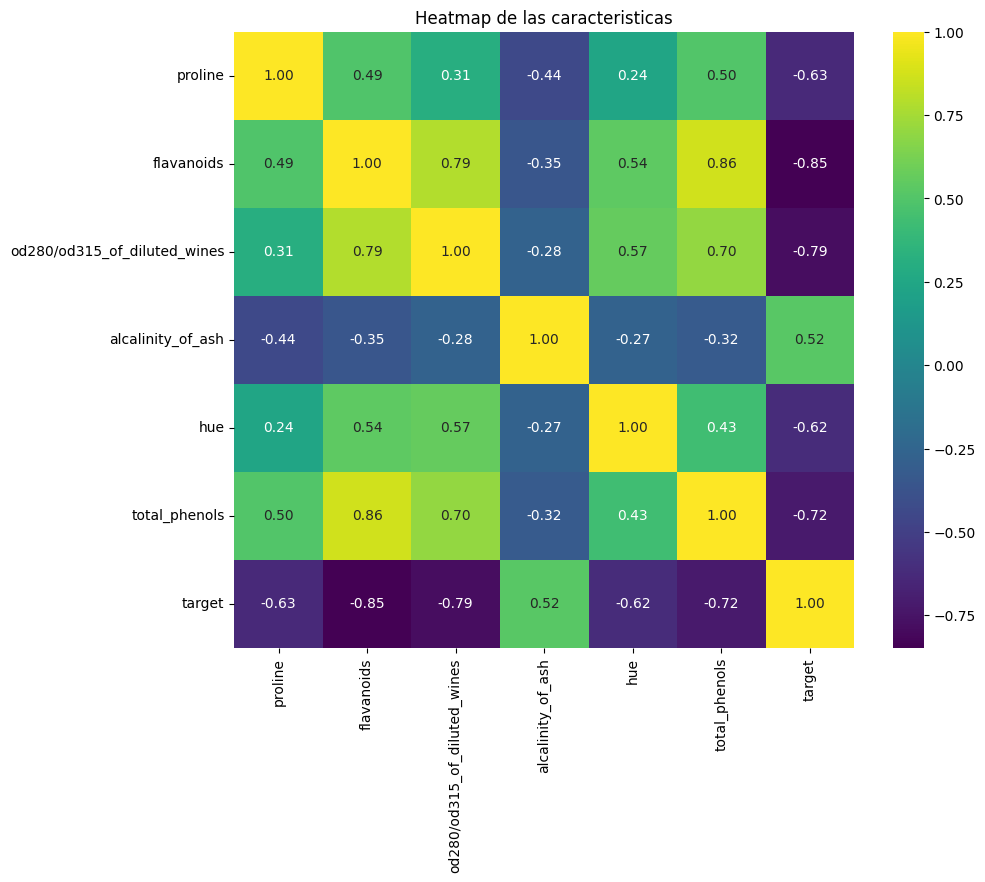

In [47]:
#subconjunto del DataFrame con caracteristicas seleccionadas
selectedDF=df[list(selectedFeatures)+['target']]

#calcular matriz de correlacion para las caracteristicas
correlationMatrixSelected=selectedDF.corr()

# mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlationMatrixSelected,annot=True, cmap='viridis', fmt='.2f')
plt.title("Heatmap de las caracteristicas")
plt.show()